In [1]:

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_a838c3d347e94831bfc461447b0694b1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='O7xuyFeiPsQngvJUmRubfBGRa1CjG3ulDbSzXUVYWnsJ',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a838c3d347e94831bfc461447b0694b1.get_object(Bucket='henryujupyternbprj1-donotdelete-pr-aunzc4zwcvubiv',Key='PS_20174392719_1491204439457_log.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#Exploratory Data Analysis

#1.) Data quality checks : check for columns with null values

print('Data has NULL value in: ')
df.isnull().any()

Data has NULL value in: 


step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [4]:
#2.) Check to see minimum and maximum values for each type of transaction

print('Minimum Amount, Origin Old balance, Origin New balance, Dest Old balance, Dest New balance are: ')
df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].min()


Minimum Amount, Origin Old balance, Origin New balance, Dest Old balance, Dest New balance are: 


amount            0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [5]:
print('Minimum Amount, Origin Old balance, Origin New balance, Dest Old balance, Dest New balance are: ')
df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].max()


Minimum Amount, Origin Old balance, Origin New balance, Dest Old balance, Dest New balance are: 


amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrig    4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

In [6]:
#3.) Visualize the total values from the 5 different types of transcations

df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], dtype=object)

Text(0,0.5,'Amount')

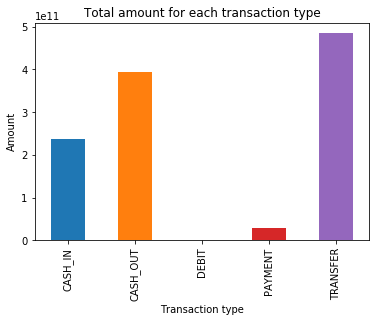

In [7]:
bar = df.groupby('type').amount.sum()
plt.figure()
bar.plot(kind = 'bar')
plt.title("Total amount for each transaction type")
plt.xlabel("Transaction type")
plt.ylabel("Amount")

In [8]:
#Determine which type of transactions lead to fraud classification

df.loc[df.isFraud ==1].type.unique()

#This shows that only Transfer and Cash Out transactions lead to fraud.

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [9]:
#4.) Check Correlation of the Features
# Firstly, i will start by dropping the non-numerical columns in our dataframe which are nameOrig and nameDest.
df = df.drop(['nameOrig','nameDest'], axis=1)

#Secondly, i will encode the different values in the type column

#define dictionary for target mapping
target_map = {'PAYMENT':1, 'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5}

# Use the pandas apply method to numerically encode our attrition target variable
df["type_numerical"] = df["type"].apply(lambda x: target_map[x])

#OR use df = df.replace(to_replace={'PAYMENT':1, 'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5}) to avoid creating a new column 

In [10]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',
       'type_numerical'],
      dtype='object')

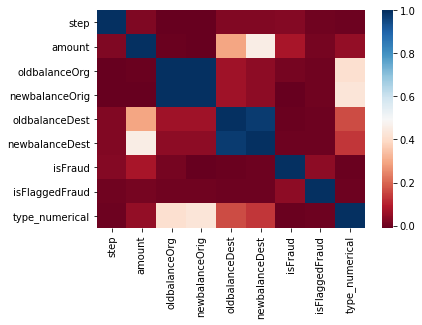

In [11]:
#plot correleation matrix of features using seaborn

sns.heatmap(df.corr(),cmap ='RdBu');

In [12]:
#scaler = preprocessing.MinMaxScaler()
#minmax_scaled_df = scaler.fit_transform(dfnorm)
#df_normalized = pd.DataFrame(minmax_scaled_df)
#df_normalized.head()

In [13]:
#numerical = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud', 'isFlaggedFraud', 'type_numerical']

#g = sns.pairplot(data, hue = 'isFraud', palette = 'seismic', diag_kind = 'kde',diag_kws=dict(shade=True))

#g.set(xticklabels=[])

In [14]:
Fraud = df.loc[df.isFraud == 1]
Fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_numerical
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0,2
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0,3
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0,2
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0,3
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0,2


In [15]:
Fraudcount = Fraud.isFraud.count()
print('Total number of fraudulent transactions is {}.'.format(Fraudcount))

Total number of fraudulent transactions is 8213.


In [16]:
nonFraud = df.loc[df.isFraud == 0]
nonFraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_numerical
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,1
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0,1
6,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0,0,1


In [17]:
NonFraudcount = nonFraud.isFraud.count()
print('Total number of non-fraudulent transactions is {}.'.format(NonFraudcount))

Total number of non-fraudulent transactions is 6354407.


In [18]:
FlaggedAsFraud = Fraud.loc[df.isFlaggedFraud ==1]
FlaggedAsFraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_numerical
2736446,212,TRANSFER,4953893.08,4953893.08,4953893.08,0.0,0.0,1,1,2
3247297,250,TRANSFER,1343002.08,1343002.08,1343002.08,0.0,0.0,1,1,2
3760288,279,TRANSFER,536624.41,536624.41,536624.41,0.0,0.0,1,1,2
5563713,387,TRANSFER,4892193.09,4892193.09,4892193.09,0.0,0.0,1,1,2
5996407,425,TRANSFER,10000000.00,19585040.37,19585040.37,0.0,0.0,1,1,2


In [19]:
FlaggedAsFraudcount = FlaggedAsFraud.isFlaggedFraud.count()
print('Total number of fraudulent transactions flagged as fraud is {}.'.format(FlaggedAsFraudcount))

Total number of fraudulent transactions flagged as fraud is 16.


In [20]:
print('Ratio of Fraudulent to Non-Fraudulent transaction is 1:{:0.3f}.'.format(NonFraudcount/Fraudcount))

Ratio of Fraudulent to Non-Fraudulent transaction is 1:773.701.


In [21]:
print('Percentage of fraudulent transaction correctly flagged as Fraud is {:0.3f}{}.'.format((FlaggedAsFraudcount * 100)/Fraudcount,'%'))

Percentage of fraudulent transaction correctly flagged as Fraud is 0.195%.


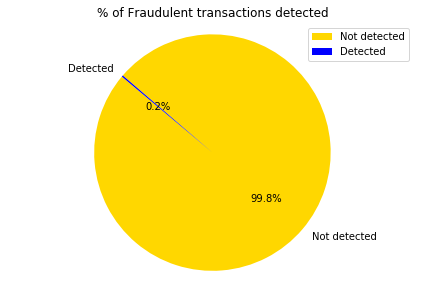

In [22]:
labels = ['Not detected', 'Detected']
sizes = [Fraudcount, FlaggedAsFraudcount]
colors = ['gold', 'blue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)

plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("% of Fraudulent transactions detected")
plt.show()


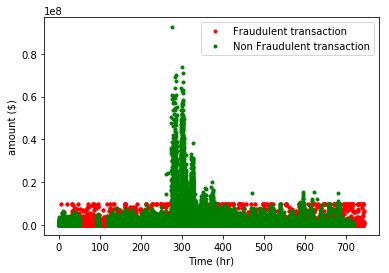

In [23]:
plt.figure()
plt.plot(Fraud['step'], Fraud['amount'] , 'ro', ms= 3, label='Fraudulent transaction')
plt.plot(nonFraud['step'], nonFraud['amount'] , 'go', ms= 3, label='Non Fraudulent transaction')
plt.xlabel('Time (hr)')
plt.ylabel('amount ($)')
plt.legend(loc='best')
plt.show()

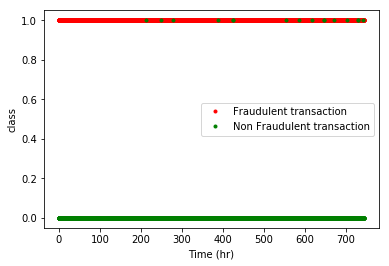

In [24]:
plt.figure()
plt.plot(df['step'], df['isFraud'] , 'ro', ms= 3, label='Fraudulent transaction')
plt.plot(df['step'], df['isFlaggedFraud'] , 'go', ms= 3, label='Non Fraudulent transaction')
plt.xlabel('Time (hr)')
plt.ylabel('class')
plt.legend(loc='best')
plt.show()

In [25]:
#Create a df of non fraudulent transactions for only Transfer and Cash out transaction types. This will allow us to compare the fingerprints of a fraudulent and
# and non-fraudulent transactions.

nonFraud2 = nonFraud.loc[(df.type == 'CASH_OUT') | (df.type == 'TRANSFER')]
#nonFraud2.head()

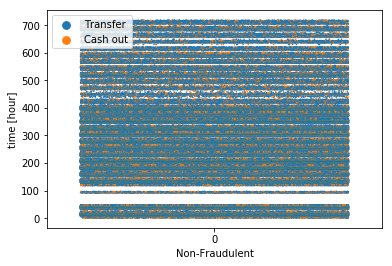

In [26]:
#Dispersion of Fraudulent and Non-Fradulent transactions over time

ax = sns.stripplot(nonFraud2['isFraud'], nonFraud2['step'], hue= nonFraud2['type'], size=1.5, jitter=0.4)
ax.set_xlabel('Non-Fraudulent')
ax.set_ylabel('time [hour]')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Transfer', 'Cash out'])

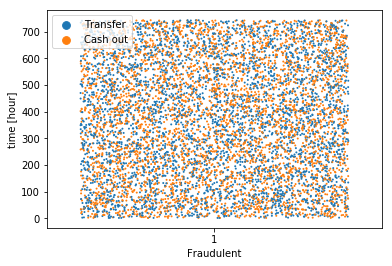

In [27]:
ax1 = sns.stripplot(Fraud['isFraud'], Fraud['step'], hue= Fraud['type'], size= 2, jitter=0.4)
ax1.set_xlabel('Fraudulent')
ax1.set_ylabel('time [hour]')
handles, labels = ax1.get_legend_handles_labels()
plt.legend(handles, ['Transfer', 'Cash out'])

In [28]:
# The plots above show how fraudulent and non-fraudulent transactions are distributed over time. It is clear from the plots that for the fraudulent transactions, both 
#transfers and Cash_out transactions are homogenously distriputed over time. So for a set of transactions with this same fingerprint in the future, they are likely to be fraudulent.

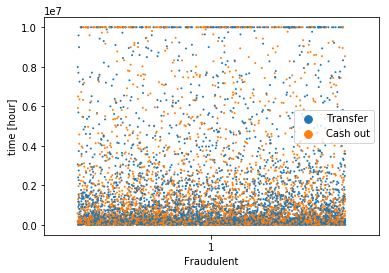

In [29]:
ax2 = sns.stripplot(Fraud['isFraud'], Fraud['amount'], hue= Fraud['type'], size= 2, jitter=0.4)
ax2.set_xlabel('Fraudulent')
ax2.set_ylabel('time [hour]')
handles, labels = ax2.get_legend_handles_labels()
plt.legend(handles, ['Transfer', 'Cash out'])

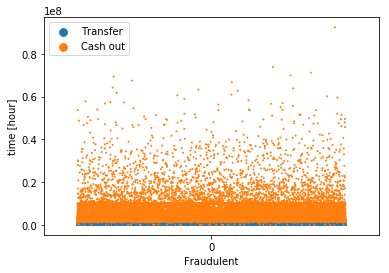

In [30]:
ax3 = sns.stripplot(nonFraud2['isFraud'], nonFraud2['amount'], hue= nonFraud2['type'], size= 2, jitter=0.4)
ax3.set_xlabel('Fraudulent')
ax3.set_ylabel('time [hour]')
handles, labels = ax3.get_legend_handles_labels()
plt.legend(handles, ['Transfer', 'Cash out'])

3.) Implement Machine Learning models

In [31]:
X = df.drop(['type', 'isFraud', 'isFlaggedFraud'], axis=1)
y = df[['isFraud']]


In [32]:
from sklearn.model_selection import train_test_split, learning_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
from sklearn.linear_model import LogisticRegression
# creating object of LogisticRegression class
classifier_logis = LogisticRegression(random_state=0)
# fitting the model/ training the model on training data (X_train,t_train)
classifier_logis.fit(X_train,y_train)
# predicting whether the transactions in the test set are fraudulent or not
y_pred_logis = classifier_logis.predict(X_test)
# evaluating model performance by confusion-matrix
cm_logis = confusion_matrix(y_test,y_pred_logis)
print(cm_logis)
# accuracy-result of LogisticRegression model
accuracy_logis = accuracy_score(y_test,y_pred_logis)
print('The accuracy of LogisticRegression is : ', str(accuracy_logis*100) , '%')

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1270449     434]
 [    587    1054]]
The accuracy of LogisticRegression is :  99.9197657569 %


In [ ]:
from sklearn.svm import SVC
# creating object of SVC class
classifier_svc = SVC(kernel='rbf', random_state=0, gamma='auto')
# fitting the model/ training the model on training data (X_train,t_train)
classifier_svc.fit(X_train,y_train)
# predicting whether the transactions in the test set are fraudulent or not
y_pred_svc = classifier_svc.predict(X_test)
# evaluating model performance by confusion-matrix
cm_svc = confusion_matrix(y_test,y_pred_svc)
print(cm_svc)
# accuracy-result of SVC model
accuracy_svc = accuracy_score(y_test,y_pred_svc)
print('The accuracy of SupportVectorClassification is : ', str(accuracy_svc*100) , '%')

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test.head()